In [1]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

# Visualization
import matplotlib.pyplot as plt

# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report #for model performance evaluation

# To generate the for loops
import glob
import os
from matplotlib import ticker

In [2]:
## READING MICE DATA

# Get the data
folder = "/Users/yoddmena/Downloads/Research/Telemetry_edited/"

files = glob.glob( folder + "Ex *.xlsx" ) 

dfs = []
for file in files:
    excel = pd.read_excel(file) # reading the excel file
    df = pd.DataFrame(excel)
    dfs.append(df)
    print(file, len(df.columns))

/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex 02 - 05_31_19 - Edited.xlsx 25
/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex 04 - 08_02_19 - Edited.xlsx 35
/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex 15 - 06_30_20 - Edited.xlsx 15
/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex 01 - 05_06_19 - Edited.xlsx 27
/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex 13 - 02_17_20 - Edited.xlsx 27
/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex 05 - 08_30_19 - Edited.xlsx 33
/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex 12 - 01_24_20 - Edited.xlsx 35
/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex 03 - 07_08_19 - Edited.xlsx 35
/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex 08 - 10_04_19 - Edited.xlsx 35
/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex 06 - 09_13_19 - Edited.xlsx 31
/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex 14 - 03_16_20 - Edited.xlsx 19
/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex

In [3]:
for i in range(len(dfs)):
    #for j in range(len(df)):
    data = dfs[i]
    data.drop(data.columns[[1, 2]], axis=1, inplace=True)
    data.drop(data.iloc[:, 4::2], inplace=True, axis=1)
    print(data, dfs[i])
    

       Minutes  CC006-315 EXP 2 MRSA CC Deg. C Data  \
0            1                                  NaN   
1            2                                  NaN   
2            3                                36.21   
3            4                                36.33   
4            5                                36.47   
...        ...                                  ...   
20187    20188                                  NaN   
20188    20189                                  NaN   
20189    20190                                  NaN   
20190    20191                                  NaN   
20191    20192                                  NaN   

       CC006-315 EXP 2 MRSA CC Cnts Data  CC006-316 EXP 2 MRSA CC Deg. C Data  \
0                                      0                                  NaN   
1                                      8                                  NaN   
2                                     26                                36.37   
3              

       Minutes  CC003-184 CC MRSA Exp 7 Deg. C Data  \
0            1                                  NaN   
1            2                                  NaN   
2            3                                36.14   
3            4                                36.14   
4            5                                36.19   
...        ...                                  ...   
20149    20150                                  NaN   
20150    20151                                  NaN   
20151    20152                                  NaN   
20152    20153                                  NaN   
20153    20154                                  NaN   

       CC003-184 CC MRSA Exp 7 Cnts Data  CC003-187 CC MRSA Exp 7 Deg. C Data  \
0                                    0.0                                  NaN   
1                                    4.0                                  NaN   
2                                    0.0                                36.00   
3              

[19967 rows x 18 columns]        Minutes  CC001-325 CC MRSA Exp 10 Deg. C Data  \
0            1                                   NaN   
1            2                                   NaN   
2            3                                 38.47   
3            4                                 38.56   
4            5                                 38.59   
...        ...                                   ...   
19962    19963                                   NaN   
19963    19964                                   NaN   
19964    19965                                   NaN   
19965    19966                                   NaN   
19966    19967                                   NaN   

       CC001-325 CC MRSA Exp 10 Cnts Data  \
0                                     0.0   
1                                    26.0   
2                                    54.0   
3                                    40.0   
4                                    18.0   
...                            

In [5]:
len(data.columns)

13

IndexError: single positional indexer is out-of-bounds

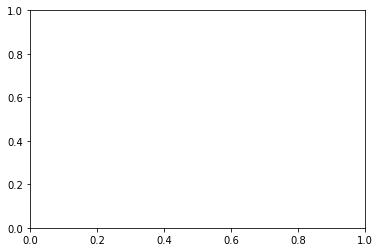

In [4]:
fig,ax = plt.subplots()

for i in range(len(dfs)):
    for j in range(len(df)):
        data = dfs[i]
        mice_min = data.iloc[:,0] #getting only the minutes
    mice_temp = data.iloc[:,3::2] # slicing the data for only temperature
    mice_temp_new = mice_temp.iloc[:,j]

In [ ]:
## READING MICE DATA

# Get the data
folder = "/Users/yoddmena/Downloads/Research/Telemetry_edited/"

files = glob.glob( folder + "Ex *.xlsx" ) 

dfs = []
min = []
for file in files:
    df = pd.read_excel(file) # reading the excel file
    
    mice_min = df.iloc[:,0] #getting only the minutes
    mice_temp = df.iloc[:,3::2] # slicing the data for only temperature
    
    min.append(mice_min) # adding minutes 
    dfs.append(mice_temp) # adding the file into the list
    #print(min) # printing each file added
     

In [ ]:
len(dfs) #checking the length of  data frame containing the temperature
len(min) #checking the length of  data frame containing the minutes

#This is to make sure their lengths are the same, which they are because they both have 13 elements in each

In [ ]:
# Plot each time series
fig,ax = plt.subplots()

for i in range(len(mice_min)):
    #ax.cla() # clear axis
    x_axis = mice_min.iloc[:,i]
    for j in range(len(mice_temp)):
        y_axis = mice_temp.iloc[:,i][:,j]
        plt.plot(x_axis, y_axis)
        plt.grid(True)
        suffix = str(i).zfill(4)
    
    
    #Saving the plot
    #df.plot(ax=ax)
    #ax.grid(True)
    #suffix = str(i).zfill(4)
    #filename = "Images/str(i)%s.png"%suffix
    #fig.savefig(filename, bbox_inches="tight")

In [ ]:
x = file["Minutes"]
y = mice_temp

fig,ax = plt.subplots()

for i in range (0,11):
    ax.cla() # clear axis
    y1 = y.iloc[:,i]
    df = pd.DataFrame(y1)
    #Plotting
    df.plot(ax=ax)
    ax.grid(True)
    suffix = str(i).zfill(4)
    filename = "Images/image_01_%s.png"%suffix
    fig.savefig(filename, bbox_inches="tight")
    

In [ ]:
type(mice_temp)

In [ ]:
mice.columns.values # to verify number of columns that contain degrees